In [1]:
import os
import json
import pandas as pd
import traceback

In [2]:
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.chains import SequentialChain

c:\Users\pawar\Desktop\CODE\GenAI\mcq\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from dotenv import load_dotenv
load_dotenv() # take environment variiables from .env

True

In [4]:
KEY = os.getenv("GOOGLE_API_KEY")

In [5]:
llm = ChatGoogleGenerativeAI(model = 'gemini-pro')

In [7]:
RESPONSE_JSON = {
    "1": {
        "mcq": "multiple choice question",
        "options": {
            "a": "choice here",
            "b": "choice here",
            "c": "choice here",
            "d": "choice here",
        },
        "correct": "correct answer",
    },
    "2": {
        "mcq": "multiple choice question",
        "options": {
            "a": "choice here",
            "b": "choice here",
            "c": "choice here",
            "d": "choice here",
        },
        "correct": "correct answer",
    },
    "3": {
        "mcq": "multiple choice question",
        "options": {
            "a": "choice here",
            "b": "choice here",
            "c": "choice here",
            "d": "choice here",
        },
        "correct": "correct answer",
    },
}


In [8]:
TEMPLATE="""
Text:{text}
You are an expert MCQ maker. Given the above text, it is your job to \
create a quiz  of {number} multiple choice questions for {subject} students in {tone} tone. 
Make sure the questions are not repeated and check all the questions to be conforming the text as well.
Make sure to format your response like  RESPONSE_JSON below  and use it as a guide. \
Ensure to make {number} MCQs
RESPONSE_JSON:
{response_json}

"""

In [9]:
quiz_generation_prompt = PromptTemplate(
    input_variables=["text", "number", "subject", "tone", "response_json"],
    template = TEMPLATE
)

In [10]:
quiz_chain=LLMChain(llm=llm, prompt=quiz_generation_prompt, output_key="quiz", verbose=True)

In [11]:
TEMPLATE2="""
You are an expert english grammarian and writer. Given a Multiple Choice Quiz for {subject} students.\
You need to evaluate the complexity of the question and give a complete analysis of the quiz. Only use at max 50 words for complexity analysis.
if the quiz is not at per with the cognitive and analytical abilities of the students,\
update the quiz questions which needs to be changed and change the tone such that it perfectly fits the student abilities
Quiz_MCQs:
{quiz}

Check from an expert English Writer of the above quiz:
"""

In [12]:
quiz_evaluation_prompt=PromptTemplate(input_variables=["subject", "quiz"], template=TEMPLATE)

In [13]:
review_chain=LLMChain(llm=llm, prompt=quiz_evaluation_prompt, output_key="review", verbose=True)

In [14]:
generate_evaluate_chain=SequentialChain(chains=[quiz_chain, review_chain], input_variables=["text", "number", "subject", "tone", "response_json"],
                                        output_variables=["quiz", "review"], verbose=True,)

In [15]:
file_path=r"../data.txt"

In [16]:
file_path

'../data.txt'

In [17]:
with open(file_path, 'r') as file:
    TEXT = file.read()

In [18]:
print(TEXT)

The term machine learning was coined in 1959 by Arthur Samuel, an IBM employee and pioneer in the field of computer gaming and artificial intelligence.[9][10] The synonym self-teaching computers was also used in this time period.[11][12]

Although the earliest machine learning model was introduced in the 1950s when Arthur Samuel invented a program that calculated the winning chance in checkers for each side, the history of machine learning roots back to decades of human desire and effort to study human cognitive processes.[13] In 1949, Canadian psychologist Donald Hebb published the book The Organization of Behavior, in which he introduced a theoretical neural structure formed by certain interactions among nerve cells.[14] Hebb's model of neurons interacting with one another set a groundwork for how AIs and machine learning algorithms work under nodes, or artificial neurons used by computers to communicate data.[13] Other researchers who have studied human cognitive systems contributed

In [19]:
json.dumps(RESPONSE_JSON)

'{"1": {"mcq": "multiple choice question", "options": {"a": "choice here", "b": "choice here", "c": "choice here", "d": "choice here"}, "correct": "correct answer"}, "2": {"mcq": "multiple choice question", "options": {"a": "choice here", "b": "choice here", "c": "choice here", "d": "choice here"}, "correct": "correct answer"}, "3": {"mcq": "multiple choice question", "options": {"a": "choice here", "b": "choice here", "c": "choice here", "d": "choice here"}, "correct": "correct answer"}}'

In [20]:
NUMBER=5
SUBJECT="data science"
TONE = "simple"

In [21]:
response=generate_evaluate_chain(
    {
        "text": TEXT,
        "number": NUMBER,
        "subject":SUBJECT,
        "tone": TONE,
        "response_json": json.dumps(RESPONSE_JSON)
    }
)

c:\Users\pawar\Desktop\CODE\GenAI\mcq\env\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new SequentialChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Text:The term machine learning was coined in 1959 by Arthur Samuel, an IBM employee and pioneer in the field of computer gaming and artificial intelligence.[9][10] The synonym self-teaching computers was also used in this time period.[11][12]

Although the earliest machine learning model was introduced in the 1950s when Arthur Samuel invented a program that calculated the winning chance in checkers for each side, the history of machine learning roots back to decades of human desire and effort to study human cognitive processes.[13] In 1949, Canadian psychologist Donald Hebb published the book The Organization of Behavior, in which he introduced a theoretical neural structure formed by certain interactions among nerve cells.[14] Hebb's model of neurons interacting with one another set a groundwork for how AIs and machine learning algorithms work under nodes, or artificial neurons used 

In [22]:
response

{'text': 'The term machine learning was coined in 1959 by Arthur Samuel, an IBM employee and pioneer in the field of computer gaming and artificial intelligence.[9][10] The synonym self-teaching computers was also used in this time period.[11][12]\n\nAlthough the earliest machine learning model was introduced in the 1950s when Arthur Samuel invented a program that calculated the winning chance in checkers for each side, the history of machine learning roots back to decades of human desire and effort to study human cognitive processes.[13] In 1949, Canadian psychologist Donald Hebb published the book The Organization of Behavior, in which he introduced a theoretical neural structure formed by certain interactions among nerve cells.[14] Hebb\'s model of neurons interacting with one another set a groundwork for how AIs and machine learning algorithms work under nodes, or artificial neurons used by computers to communicate data.[13] Other researchers who have studied human cognitive system

In [23]:
quiz=response.get("quiz")

In [24]:
json_start_index = quiz.find('{')  # Find the index of the opening curly brace
json_text = quiz[json_start_index:]

In [34]:
quiz=json.loads(json_text)

In [26]:
print(quiz)

{'1': {'mcq': "Who coined the term 'machine learning'?", 'options': {'a': 'Donald Hebb', 'b': 'Arthur Samuel', 'c': 'Walter Pitts', 'd': 'Warren McCulloch'}, 'correct': 'b'}, '2': {'mcq': 'Which of the following was NOT a synonym for machine learning in the early days?', 'options': {'a': 'Self-teaching computers', 'b': 'Cognitive machines', 'c': 'Artificial intelligence', 'd': 'Intelligent systems'}, 'correct': 'b'}, '3': {'mcq': "What was the basis for Hebb's model of neural interaction?", 'options': {'a': 'Human cognitive processes', 'b': 'Computer algorithms', 'c': 'Sonar signals', 'd': 'Speech patterns'}, 'correct': 'a'}, '4': {'mcq': "Which company developed the experimental 'learning machine' Cybertron?", 'options': {'a': 'IBM', 'b': 'Raytheon Company', 'c': 'Apple', 'd': 'Microsoft'}, 'correct': 'b'}, '5': {'mcq': 'What type of learning was used by Cybertron?', 'options': {'a': 'Supervised learning', 'b': 'Unsupervised learning', 'c': 'Reinforcement learning', 'd': 'Semi-supervi

In [27]:
quiz_table_data = []
for key, value in quiz.items():
    mcq = value["mcq"]
    options = " | ".join(
        [
            f"{option}: {option_value}"
            for option, option_value in value["options"].items()
            ]
        )
    correct = value["correct"]
    quiz_table_data.append({"MCQ": mcq, "Choices": options, "Correct": correct})

In [28]:
quiz_table_data

[{'MCQ': "Who coined the term 'machine learning'?",
  'Choices': 'a: Donald Hebb | b: Arthur Samuel | c: Walter Pitts | d: Warren McCulloch',
  'Correct': 'b'},
 {'MCQ': "What was the name of the experimental 'learning machine' developed in the early 1960s?",
  'Choices': "a: Cybertron | b: Nilsson's Learning Machine | c: Duda-Hart Pattern Recognizer | d: Hebbian Neural Network",
  'Correct': 'a'},
 {'MCQ': 'What book introduced the concept of a theoretical neural structure formed by interactions among nerve cells?',
  'Choices': 'a: The Organization of Behavior | b: Learning Machines | c: Pattern Recognition | d: Teaching Strategies for Neural Networks',
  'Correct': 'a'},
 {'MCQ': 'Which of the following researchers contributed to the development of modern machine learning technologies through their studies of human cognitive systems?',
  'Choices': 'a: Raytheon Company | b: Walter Pitts and Warren McCulloch | c: Nilsson | d: Duda and Hart',
  'Correct': 'b'},
 {'MCQ': "What was the 

In [29]:
quiz=pd.DataFrame(quiz_table_data)

In [30]:
quiz

,MCQ,Choices,Correct
0,Who coined the term 'machine learning'?,a: Donald Hebb | b: Arthur Samuel | c: Walter ...,b
1,What was the name of the experimental 'learnin...,a: Cybertron | b: Nilsson's Learning Machine |...,a
2,What book introduced the concept of a theoreti...,a: The Organization of Behavior | b: Learning ...,a
3,Which of the following researchers contributed...,a: Raytheon Company | b: Walter Pitts and Warr...,b
4,What was the focus of Nilsson's book on machin...,a: Sonar signal analysis | b: Electrocardiogra...,c


In [31]:
quiz.to_csv("machinelearning.csv", index =False)

In [28]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.2/42.8 MB 3.5 MB/s eta 0:00:13
     ---------------------------------------- 0.5/42.8 MB 5.0 MB/s eta 0:00:09
      --------------------------------------- 0.8/42.8 MB 5.5 MB/s eta 0:00:08
      --------------------------------------- 1.0/42.8 MB 5.7 MB/s eta 0:00:08
     - -------------------------------------- 1.4/42.8 MB 6.1 MB/s eta 0:00:07
     - -------------------------------------- 1.6/42.8 MB 6.1 MB/s eta 0:00:07
     - -------------------------------------- 2.1/42.8 MB 6.3 MB/s eta 0:00:07
     -- ------------------------------------- 2.4/42.8 MB 6.5 MB/s eta 0:00:07
     -- ------------------------------------- 2.8/42.8 MB 6.6 MB/s eta 0:00:07
     -- ------------------------------------- 3.2/42.8 MB 6.8 MB/s eta 0:00:06
     --- ------------------------------------ 3.5/42.8 MB 6.8 MB/s eta 0:00:06
     --- ------------------------------------ 3.9/42.8 MB 7

In [29]:
import spacy
import matplotlib.pyplot as plt
import numpy as np
# Load the English language model
nlp = spacy.load("en_core_web_md")

In [36]:
print(quiz)

{'1': {'mcq': "Who coined the term 'machine learning'?", 'options': {'a': 'Donald Hebb', 'b': 'Arthur Samuel', 'c': 'Walter Pitts', 'd': 'Warren McCulloch'}, 'correct': 'b'}, '2': {'mcq': 'Which of the following was NOT a synonym for machine learning in the early days?', 'options': {'a': 'Self-teaching computers', 'b': 'Cognitive machines', 'c': 'Artificial intelligence', 'd': 'Intelligent systems'}, 'correct': 'b'}, '3': {'mcq': "What was the basis for Hebb's model of neural interaction?", 'options': {'a': 'Human cognitive processes', 'b': 'Computer algorithms', 'c': 'Sonar signals', 'd': 'Speech patterns'}, 'correct': 'a'}, '4': {'mcq': "Which company developed the experimental 'learning machine' Cybertron?", 'options': {'a': 'IBM', 'b': 'Raytheon Company', 'c': 'Apple', 'd': 'Microsoft'}, 'correct': 'b'}, '5': {'mcq': 'What type of learning was used by Cybertron?', 'options': {'a': 'Supervised learning', 'b': 'Unsupervised learning', 'c': 'Reinforcement learning', 'd': 'Semi-supervi

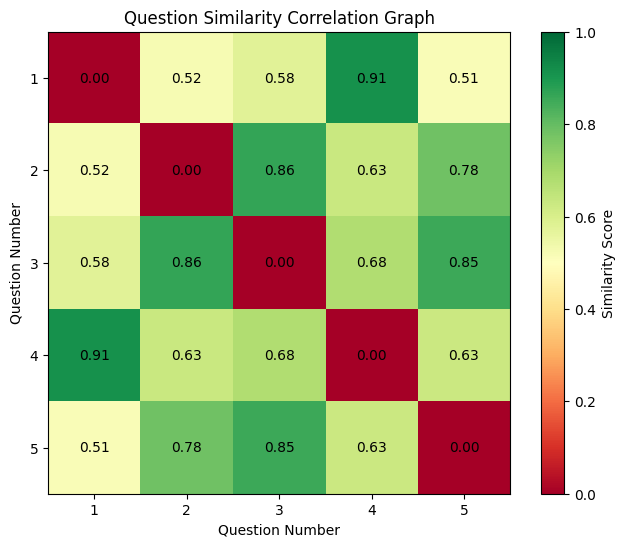

In [35]:


def compare_question_similarity(question1, question2):
    """
    Compare the similarity between two multiple choice questions using NLP techniques.
    
    Args:
    - question1 (dict): The first multiple choice question in JSON format.
    - question2 (dict): The second multiple choice question in JSON format.
    
    Returns:
    - float: A score indicating the similarity between the questions.
    """
    doc1 = nlp(question1['mcq'])
    doc2 = nlp(question2['mcq'])
    return doc1.similarity(doc2)

def compare_all_questions_similarity(questions):
    """
    Compare the similarity between all pairs of multiple choice questions.
    
    Args:
    - questions (dict): A dictionary containing multiple choice questions in JSON format.
    
    Returns:
    - np.ndarray: A correlation matrix indicating the similarity between all pairs of questions.
    """
    num_questions = len(questions)
    similarity_matrix = np.zeros((num_questions, num_questions))
    
    for i in range(num_questions):
        for j in range(i+1, num_questions):
            question1 = questions[str(i+1)]
            question2 = questions[str(j+1)]
            similarity_matrix[i, j] = compare_question_similarity(question1, question2)
            similarity_matrix[j, i] = similarity_matrix[i, j]  # similarity is symmetric
    
    return similarity_matrix

def plot_correlation_graph(similarity_matrix):
    """
    Plot a correlation graph based on the similarity matrix.
    
    Args:
    - similarity_matrix (np.ndarray): A correlation matrix indicating the similarity between all pairs of questions.
    """
    num_questions = similarity_matrix.shape[0]
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap='RdYlGn', interpolation='nearest', vmin=0, vmax=1)
    plt.colorbar(label='Similarity Score')
    plt.xticks(np.arange(num_questions), np.arange(1, num_questions + 1))
    plt.yticks(np.arange(num_questions), np.arange(1, num_questions + 1))
    plt.xlabel('Question Number')
    plt.ylabel('Question Number')
    plt.title('Question Similarity Correlation Graph')

    # Display similarity scores in the graph
    for i in range(num_questions):
        for j in range(num_questions):
            plt.text(j, i, f'{similarity_matrix[i, j]:.2f}', ha='center', va='center', color='black')

    plt.show()

similarity_matrix = compare_all_questions_similarity(quiz)
plot_correlation_graph(similarity_matrix)


In [31]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ------ ------------------------------ 30.7/162.8 kB 330.3 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/162.8 kB 655.4 kB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.8 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 162.8/162.8 kB 696.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
    --------------------------------------- 0.2/7.7 MB 5.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.7 MB 6.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.7 MB 7.7 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/7.7 MB 7.3 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/7.7 MB 7.2 MB/s eta 0:00:01
   --------- ------------------------------ 1.8/7.7 MB 6.4 MB/s eta 0:00:01
   -----

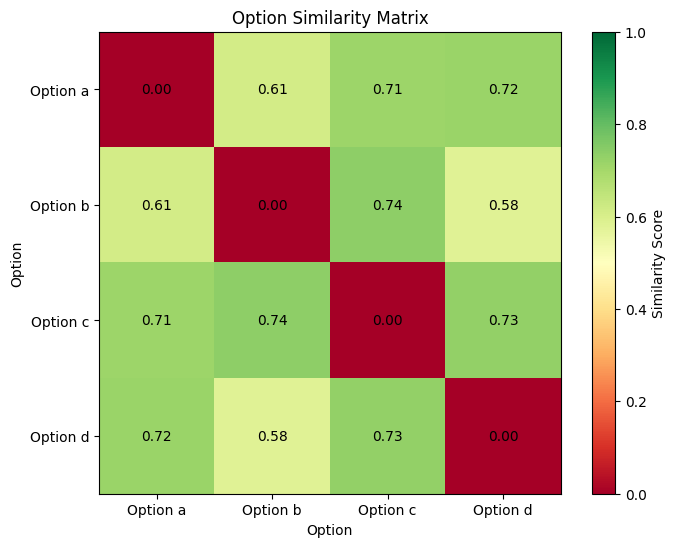

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_md")

def compare_options_similarity(question):
    """
    Compare the similarity between options of a multiple choice question using NLP techniques.
    
    Args:
    - question (dict): The multiple choice question in JSON format.
    
    Returns:
    - np.ndarray: A similarity matrix indicating the similarity between all pairs of options.
    """
    options = list(question['options'].values())
    num_options = len(options)
    similarity_matrix = np.zeros((num_options, num_options))
    
    for i in range(num_options):
        for j in range(i+1, num_options):
            option1 = options[i]
            option2 = options[j]
            doc1 = nlp(option1)
            doc2 = nlp(option2)
            similarity_matrix[i, j] = doc1.similarity(doc2)
            similarity_matrix[j, i] = similarity_matrix[i, j]  # similarity is symmetric
    
    return similarity_matrix

def plot_similarity_matrix(similarity_matrix):
    """
    Plot a similarity matrix using a graph with values displayed and color scheme of red to green.
    
    Args:
    - similarity_matrix (np.ndarray): A similarity matrix indicating the similarity between all pairs of options.
    """
    num_options = similarity_matrix.shape[0]
    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_matrix, cmap='RdYlGn', interpolation='nearest', vmin=0, vmax=1)
    plt.colorbar(label='Similarity Score')
    plt.xticks(np.arange(num_options), ['Option ' + chr(ord('a') + i) for i in range(num_options)])
    plt.yticks(np.arange(num_options), ['Option ' + chr(ord('a') + i) for i in range(num_options)])
    plt.xlabel('Option')
    plt.ylabel('Option')
    plt.title('Option Similarity Matrix')

    # Display similarity scores in the graph
    for i in range(num_options):
        for j in range(num_options):
            plt.text(j, i, f'{similarity_matrix[i, j]:.2f}', ha='center', va='center', color='black')

    plt.show()

# Example usage:
question_number = '1'  # Choose the question number to analyze
question = quiz[question_number]
similarity_matrix = compare_options_similarity(question)
plot_similarity_matrix(similarity_matrix)


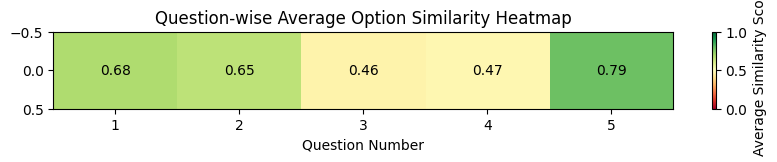

In [42]:
def average_options_similarity(question):
    """
    Calculate the average similarity between options of a multiple choice question using NLP techniques.
    
    Args:
    - question (dict): The multiple choice question in JSON format.
    
    Returns:
    - float: The average similarity between options.
    """
    options = list(question['options'].values())
    num_options = len(options)
    total_similarity = 0
    
    for i in range(num_options):
        for j in range(i+1, num_options):
            option1 = options[i]
            option2 = options[j]
            doc1 = nlp(option1)
            doc2 = nlp(option2)
            total_similarity += doc1.similarity(doc2)
    
    average_similarity = total_similarity / (num_options * (num_options - 1) / 2)
    return average_similarity

def plot_average_similarity_heatmap(quiz):
    """
    Plot a heatmap of average similarity between options for each question in the quiz.
    
    Args:
    - quiz (dict): A dictionary containing multiple choice questions in JSON format.
    """
    num_questions = len(quiz)
    average_similarities = []
    
    for question_number in sorted(quiz.keys()):
        question = quiz[question_number]
        average_similarity = average_options_similarity(question)
        average_similarities.append(average_similarity)
    
    plt.figure(figsize=(10, 1))
    heatmap = plt.imshow(np.array(average_similarities).reshape(1, -1), cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    plt.colorbar(heatmap, label='Average Similarity Score')
    plt.xticks(np.arange(num_questions), sorted(quiz.keys()))
    plt.xlabel('Question Number')
    plt.title('Question-wise Average Option Similarity Heatmap')

    # Display similarity scores in the graph
    for i, similarity in enumerate(average_similarities):
        plt.text(i, 0, f'{similarity:.2f}', ha='center', va='center', color='black')

    plt.show()


plot_average_similarity_heatmap(quiz)

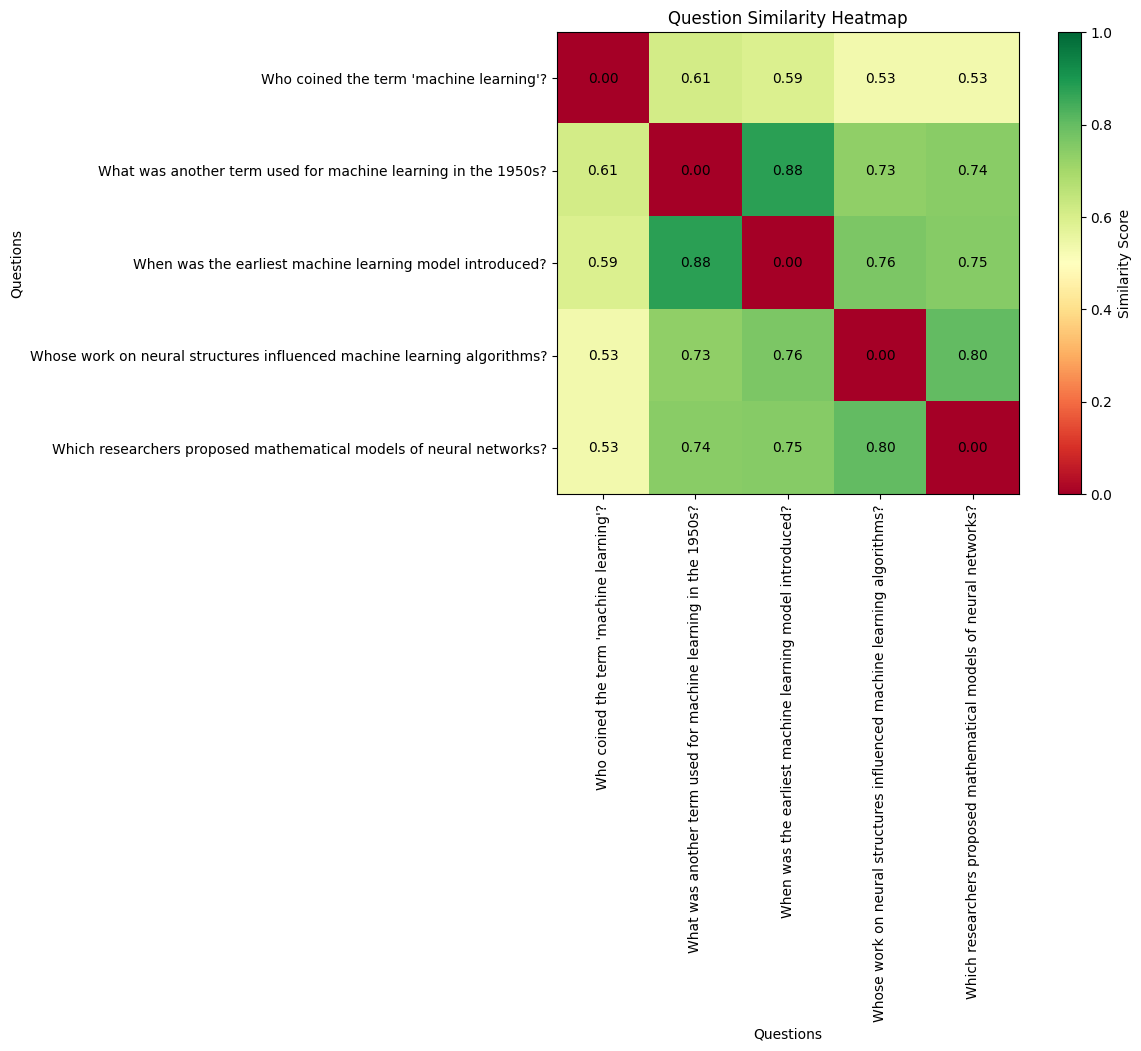

In [43]:
questions = [
    "Who coined the term 'machine learning'?",
    "What was another term used for machine learning in the 1950s?",
    "When was the earliest machine learning model introduced?",
    "Whose work on neural structures influenced machine learning algorithms?",
    "Which researchers proposed mathematical models of neural networks?"
]

def compare_questions_similarity(questions):
    """
    Compare the similarity between all pairs of questions.
    
    Args:
    - questions (list): A list of questions.
    
    Returns:
    - np.ndarray: A similarity matrix indicating the similarity between all pairs of questions.
    """
    num_questions = len(questions)
    similarity_matrix = np.zeros((num_questions, num_questions))
    
    for i in range(num_questions):
        for j in range(i+1, num_questions):
            doc1 = nlp(questions[i])
            doc2 = nlp(questions[j])
            similarity_matrix[i, j] = doc1.similarity(doc2)
            similarity_matrix[j, i] = similarity_matrix[i, j]  # similarity is symmetric
    
    return similarity_matrix

def plot_similarity_heatmap(similarity_matrix, questions):
    """
    Plot a heatmap of similarity between questions.
    
    Args:
    - similarity_matrix (np.ndarray): A similarity matrix indicating the similarity between all pairs of questions.
    - questions (list): A list of questions.
    """
    num_questions = len(questions)
    plt.figure(figsize=(10, 6))
    heatmap = plt.imshow(similarity_matrix, cmap='RdYlGn', interpolation='nearest', vmin=0, vmax=1)
    plt.colorbar(heatmap, label='Similarity Score')
    plt.xticks(np.arange(num_questions), questions, rotation=90)
    plt.yticks(np.arange(num_questions), questions)
    plt.xlabel('Questions')
    plt.ylabel('Questions')
    plt.title('Question Similarity Heatmap')

    # Display similarity scores in the graph
    for i in range(num_questions):
        for j in range(num_questions):
            plt.text(j, i, f'{similarity_matrix[i, j]:.2f}', ha='center', va='center', color='black')

    plt.show()

# Compare similarity between questions
similarity_matrix = compare_questions_similarity(questions)

# Plot heatmap
plot_similarity_heatmap(similarity_matrix, questions)

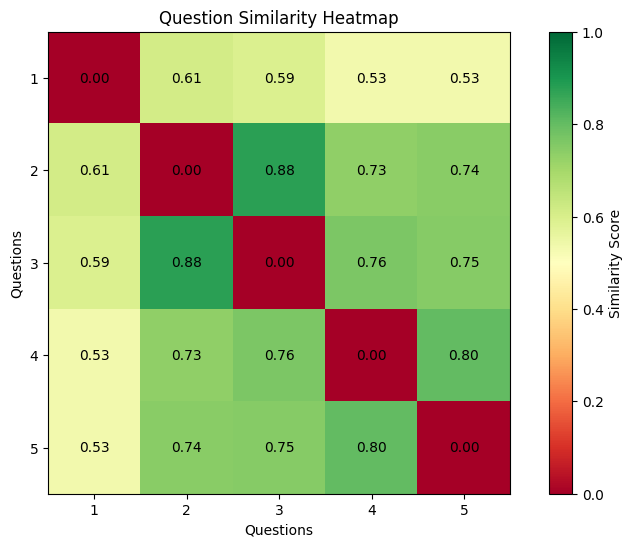

In [44]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

# Load the English language model
nlp = spacy.load("en_core_web_md")

# List of questions
questions = [
    "Who coined the term 'machine learning'?",
    "What was another term used for machine learning in the 1950s?",
    "When was the earliest machine learning model introduced?",
    "Whose work on neural structures influenced machine learning algorithms?",
    "Which researchers proposed mathematical models of neural networks?"
]

def compare_questions_similarity(questions):
    """
    Compare the similarity between all pairs of questions.
    
    Args:
    - questions (list): A list of questions.
    
    Returns:
    - np.ndarray: A similarity matrix indicating the similarity between all pairs of questions.
    """
    num_questions = len(questions)
    similarity_matrix = np.zeros((num_questions, num_questions))
    
    for i in range(num_questions):
        for j in range(i+1, num_questions):
            doc1 = nlp(questions[i])
            doc2 = nlp(questions[j])
            similarity_matrix[i, j] = doc1.similarity(doc2)
            similarity_matrix[j, i] = similarity_matrix[i, j]  # similarity is symmetric
    
    return similarity_matrix

def plot_similarity_heatmap(similarity_matrix, questions):
    """
    Plot a heatmap of similarity between questions.
    
    Args:
    - similarity_matrix (np.ndarray): A similarity matrix indicating the similarity between all pairs of questions.
    - questions (list): A list of questions.
    """
    num_questions = len(questions)
    plt.figure(figsize=(10, 6))
    heatmap = plt.imshow(similarity_matrix, cmap='RdYlGn', interpolation='nearest', vmin=0, vmax=1)
    plt.colorbar(heatmap, label='Similarity Score')
    plt.xticks(np.arange(num_questions), np.arange(1, num_questions + 1))
    plt.yticks(np.arange(num_questions), np.arange(1, num_questions + 1))
    plt.xlabel('Questions')
    plt.ylabel('Questions')
    plt.title('Question Similarity Heatmap')

    # Display similarity scores in the graph
    for i in range(num_questions):
        for j in range(num_questions):
            plt.text(j, i, f'{similarity_matrix[i, j]:.2f}', ha='center', va='center', color='black')

    plt.show()

# Compare similarity between questions
similarity_matrix = compare_questions_similarity(questions)

# Plot heatmap
plot_similarity_heatmap(similarity_matrix, questions)


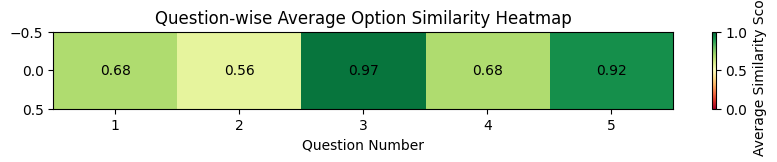

In [46]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

# Load the English language model
nlp = spacy.load("en_core_web_md")

def average_options_similarity(options):
    """
    Calculate the average similarity between options of a multiple choice question using NLP techniques.
    
    Args:
    - options (list): A list containing options of a multiple-choice question.
    
    Returns:
    - float: The average similarity between options.
    """
    num_options = len(options)
    total_similarity = 0
    
    for i in range(num_options):
        for j in range(i+1, num_options):
            option1 = options[i]
            option2 = options[j]
            doc1 = nlp(option1)
            doc2 = nlp(option2)
            total_similarity += doc1.similarity(doc2)
    
    average_similarity = total_similarity / (num_options * (num_options - 1) / 2)
    return average_similarity

def plot_average_similarity_heatmap(options_list):
    """
    Plot a heatmap of average similarity between options for each question in the quiz.
    
    Args:
    - options_list (list): A list containing multiple choice questions, where each question is represented by a list of options.
    """
    num_questions = len(options_list)
    average_similarities = []
    
    for options in options_list:
        average_similarity = average_options_similarity(options)
        average_similarities.append(average_similarity)
    
    plt.figure(figsize=(10, 1))
    heatmap = plt.imshow(np.array(average_similarities).reshape(1, -1), cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    plt.colorbar(heatmap, label='Average Similarity Score')
    plt.xticks(np.arange(num_questions), np.arange(1, num_questions + 1))
    plt.xlabel('Question Number')
    plt.title('Question-wise Average Option Similarity Heatmap')

    # Display similarity scores in the graph
    for i, similarity in enumerate(average_similarities):
        plt.text(i, 0, f'{similarity:.2f}', ha='center', va='center', color='black')

    plt.show()

# Example usage:
options_list = [
    ["Arthur Samuel", "Donald Hebb", "Walter Pitts", "Warren McCulloch"],
    ["Self-teaching computers", "Artificial intelligence", "Neural networks", "Computer science"],
    ["1949", "1950", "1955", "1959"],
    ["Arthur Samuel", "Donald Hebb", "Walter Pitts", "Warren McCulloch"],
    ["Arthur Samuel and Donald Hebb", "Walter Pitts and Warren McCulloch", "Donald Hebb and Walter Pitts", "Arthur Samuel and Warren McCulloch"]
]

plot_average_similarity_heatmap(options_list)
